from google.colab import drive
drive.mount('/content/drive')

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('../data/obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [19]:
#Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
#Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical columns : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [20]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['family_history_with_overweight']=le.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = le.fit_transform(df['FAVC'])
df['CAEC'] = le.fit_transform(df['CAEC'])
df['SMOKE'] = le.fit_transform(df['SMOKE'])
df['SCC']= le.fit_transform(df['SCC'])
df['CALC'] = le.fit_transform(df['CALC'])
df['MTRANS'] = le.fit_transform(df['MTRANS'])
df['NObeyesdad'] = df['NObeyesdad'].replace(
    {"Insufficient_Weight":0, "Normal_Weight":1,"Overweight_Level_I":2,"Overweight_Level_II":3,
     "Obesity_Type_I":4,"Obesity_Type_II":5,"Obesity_Type_III":6})

df

C:\Users\Admin\AppData\Local\Temp\ipykernel_4940\3136844729.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['NObeyesdad'] = df['NObeyesdad'].replace(


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.00,1,0,2.0,3.0,2,0,2.00,0,0.00,1.000,3,3,1
1,0,21,1.52,56.00,1,0,3.0,3.0,2,1,3.00,1,3.00,0.000,2,3,1
2,1,23,1.80,77.00,1,0,2.0,3.0,2,0,2.00,0,2.00,1.000,1,3,1
3,1,27,1.80,87.00,0,0,3.0,3.0,2,0,2.00,0,2.00,0.000,1,4,2
4,1,22,1.78,89.80,0,0,2.0,1.0,2,0,2.00,0,0.00,0.000,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,2,0,1.73,0,1.68,0.906,2,3,6
2107,0,22,1.75,133.74,1,1,3.0,3.0,2,0,2.01,0,1.34,0.599,2,3,6
2108,0,23,1.75,133.69,1,1,3.0,3.0,2,0,2.05,0,1.41,0.646,2,3,6
2109,0,24,1.74,133.35,1,1,3.0,3.0,2,0,2.85,0,1.14,0.586,2,3,6


In [21]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df.dropna()
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,38,1.68,77.22,1,1,2.44,3.00,2,0,1.03,0,0.00,0.000,3,0,3
1,1,23,1.72,94.74,1,1,2.00,3.00,2,0,2.18,0,1.93,0.213,3,3,4
2,1,31,1.67,100.54,1,1,2.96,2.38,2,0,1.00,0,1.74,0.395,3,3,5
3,1,23,1.85,121.42,1,1,3.00,2.57,2,0,2.01,0,0.92,0.000,2,3,5
4,1,20,1.70,65.00,0,1,2.00,3.00,2,0,2.00,0,0.00,1.000,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,26,1.62,105.31,1,1,3.00,3.00,2,0,1.04,0,0.10,0.430,2,3,6
2107,0,16,1.62,65.06,1,1,2.39,1.00,2,0,1.44,1,0.11,1.166,3,3,2
2108,0,21,1.71,131.41,1,1,3.00,3.00,2,0,1.73,0,1.68,0.906,2,3,6
2109,1,18,1.75,80.00,1,1,2.00,3.00,0,0,2.00,0,0.00,0.000,1,3,2


In [22]:
df.to_csv('../data/obesity_encoded.csv', index=False)

In [23]:
df1 = pd.read_csv('../data/obesity_encoded.csv')
df1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,38,1.68,77.22,1,1,2.44,3.00,2,0,1.03,0,0.00,0.000,3,0,3
1,1,23,1.72,94.74,1,1,2.00,3.00,2,0,2.18,0,1.93,0.213,3,3,4
2,1,31,1.67,100.54,1,1,2.96,2.38,2,0,1.00,0,1.74,0.395,3,3,5
3,1,23,1.85,121.42,1,1,3.00,2.57,2,0,2.01,0,0.92,0.000,2,3,5
4,1,20,1.70,65.00,0,1,2.00,3.00,2,0,2.00,0,0.00,1.000,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,26,1.62,105.31,1,1,3.00,3.00,2,0,1.04,0,0.10,0.430,2,3,6
2107,0,16,1.62,65.06,1,1,2.39,1.00,2,0,1.44,1,0.11,1.166,3,3,2
2108,0,21,1.71,131.41,1,1,3.00,3.00,2,0,1.73,0,1.68,0.906,2,3,6
2109,1,18,1.75,80.00,1,1,2.00,3.00,0,0,2.00,0,0.00,0.000,1,3,2


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

scaler = MinMaxScaler(feature_range=(0,1))
x = df1.drop('NObeyesdad', axis=1)
x[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']] = scaler.fit_transform(x[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']])
y = df1['NObeyesdad']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


x


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,0.510638,0.433962,0.285224,1,1,0.720,0.666667,2,0,0.015,0,0.000000,0.0000,3,0
1,1,0.191489,0.509434,0.415970,1,1,0.500,0.666667,2,0,0.590,0,0.643333,0.1065,3,3
2,1,0.361702,0.415094,0.459254,1,1,0.980,0.460000,2,0,0.000,0,0.580000,0.1975,3,3
3,1,0.191489,0.754717,0.615075,1,1,1.000,0.523333,2,0,0.505,0,0.306667,0.0000,2,3
4,1,0.127660,0.471698,0.194030,0,1,0.500,0.666667,2,0,0.500,0,0.000000,0.5000,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.255319,0.320755,0.494851,1,1,1.000,0.666667,2,0,0.020,0,0.033333,0.2150,2,3
2107,0,0.042553,0.320755,0.194478,1,1,0.695,0.000000,2,0,0.220,1,0.036667,0.5830,3,3
2108,0,0.148936,0.490566,0.689627,1,1,1.000,0.666667,2,0,0.365,0,0.560000,0.4530,2,3
2109,1,0.085106,0.566038,0.305970,1,1,0.500,0.666667,0,0,0.500,0,0.000000,0.0000,1,3


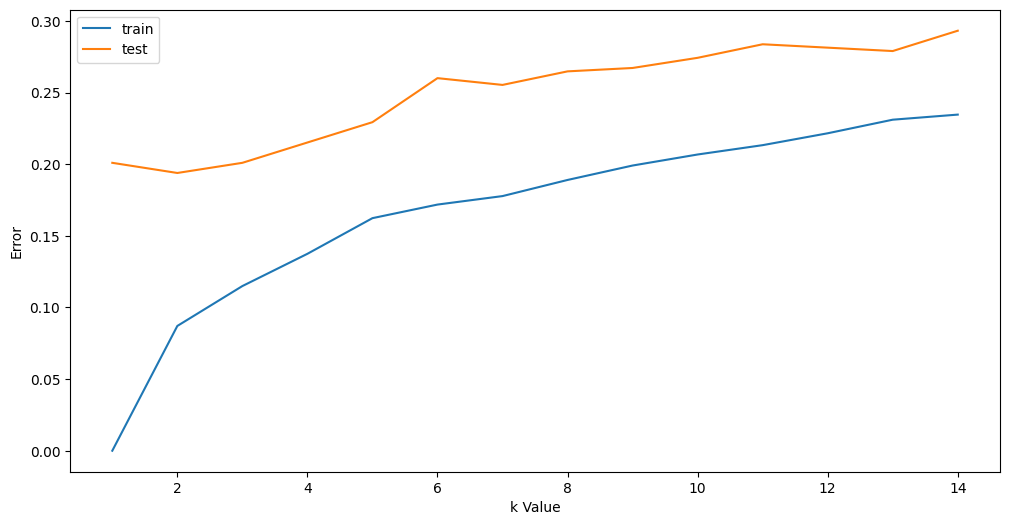

In [25]:
error1 =[]
error2 =[]
for k in range(1,15):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  y_pred1 = model.predict(x_train)
  error1.append(np.mean(y_pred1 != y_train))
  y_pred2 = model.predict(x_test)
  error2.append(np.mean(y_pred2 != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [28]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Accuracy:  0.7399527186761229

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77        56
           1       0.72      0.40      0.51        65
           2       0.60      0.70      0.65        46
           3       0.60      0.54      0.57        56
           4       0.73      0.75      0.74        79
           5       0.82      0.94      0.88        53
           6       0.94      0.99      0.96        68

    accuracy                           0.74       423
   macro avg       0.73      0.74      0.73       423
weighted avg       0.74      0.74      0.73       423

